CPU PERFORMANCE  https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
in this notebook we are going to make a machine learning model which can predict the erp values of cpu from other features,
we will be using two models xgb regressor and linear regression,after comparing the rmse of these two we can find the better model

In [23]:
#importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [90]:
#creating the dataframe
df=pd.read_csv(r"C:\Users\adithyan sukumar\Desktop\data science\cpu_performance.csv",names=['vendor name','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp'])
df.head()

,vendor name,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [25]:
print("total number of vendors {}".format(df['vendor name'].nunique()))
print("total number of models {} ".format(df['model'].nunique()))

total number of vendors 30
total number of models 209 


from the above observation it is clear that we have 30 companies which manufacture cpu and there are 209 unique models,so it is better to drop the model column

In [26]:
df.info()#getting basic info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor name  209 non-null    object
 1   model        209 non-null    object
 2   myct         209 non-null    int64 
 3   mmin         209 non-null    int64 
 4   mmax         209 non-null    int64 
 5   cach         209 non-null    int64 
 6   chmin        209 non-null    int64 
 7   chmax        209 non-null    int64 
 8   prp          209 non-null    int64 
 9   erp          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [27]:
df.describe() #getting some statistical information about the data

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [37]:
for name in df.columns[2:]:
    print("vendor and model with highest value in  {} \t is \t \n  {} \n ".format(name,df[df[name]==max(df[name])].iloc[:,[0,1]]))

vendor and model with highest value in  myct 	 is 	 
      vendor name   model
122         ibm  8130-a
123         ibm  8130-b 
 
vendor and model with highest value in  mmin 	 is 	 
    vendor name     model
9      amdahl  580-5880 
 
vendor and model with highest value in  mmax 	 is 	 
      vendor name     model
8        amdahl  580-5860
9        amdahl  580-5880
198      sperry   1100/93
199      sperry   1100/94 
 
vendor and model with highest value in  cach 	 is 	 
      vendor name    model
0       adviser    32/60
156         nas  as/9060 
 
vendor and model with highest value in  chmin 	 is 	 
      vendor name    model
196      sperry  1100/83
197      sperry  1100/84 
 
vendor and model with highest value in  chmax 	 is 	 
      vendor name    model
198      sperry  1100/93
199      sperry  1100/94 
 
vendor and model with highest value in  prp 	 is 	 
      vendor name    model
199      sperry  1100/94 
 
vendor and model with highest value in  erp 	 is 	 
    vendor name 

In [38]:
for name in df.columns[2:]:
    print("vendor and model with lowest  value in  {} \t is \t \n  {} \n ".format(name,df[df[name]==min(df[name])].iloc[:,[0,1]]))

vendor and model with lowest  value in  myct 	 is 	 
      vendor name   model
120         ibm  4381-1
121         ibm  4381-2 
 
vendor and model with lowest  value in  mmin 	 is 	 
     vendor name model
14         bti  5000 
 
vendor and model with lowest  value in  mmax 	 is 	 
     vendor name model
14         bti  5000 
 
vendor and model with lowest  value in  cach 	 is 	 
      vendor name  model
10       apollo  dn320
14          bti   5000
15          bti   8000
17    burroughs  b2900
18    burroughs  b2925
..          ...    ...
202      sperry   80/5
203      sperry   80/6
204      sperry   80/8
206      sratus     32
208        wang  vs-90

[69 rows x 2 columns] 
 
vendor and model with lowest  value in  chmin 	 is 	 
      vendor name   model
122         ibm  8130-a
123         ibm  8130-b
124         ibm    8140
207        wang  vs-100
208        wang   vs-90 
 
vendor and model with lowest  value in  chmax 	 is 	 
      vendor name   model
122         ibm  8130-a
123   

from the above two observations we can see the vendors and models with highest and lowest values with respect to each feature

In [47]:
#lets check wether null values are present
df.isnull().sum()

vendor name    0
model          0
myct           0
mmin           0
mmax           0
cach           0
chmin          0
chmax          0
prp            0
erp            0
dtype: int64

from the above observation it is clear that there are no null values

<AxesSubplot:xlabel='vendor name', ylabel='count'>

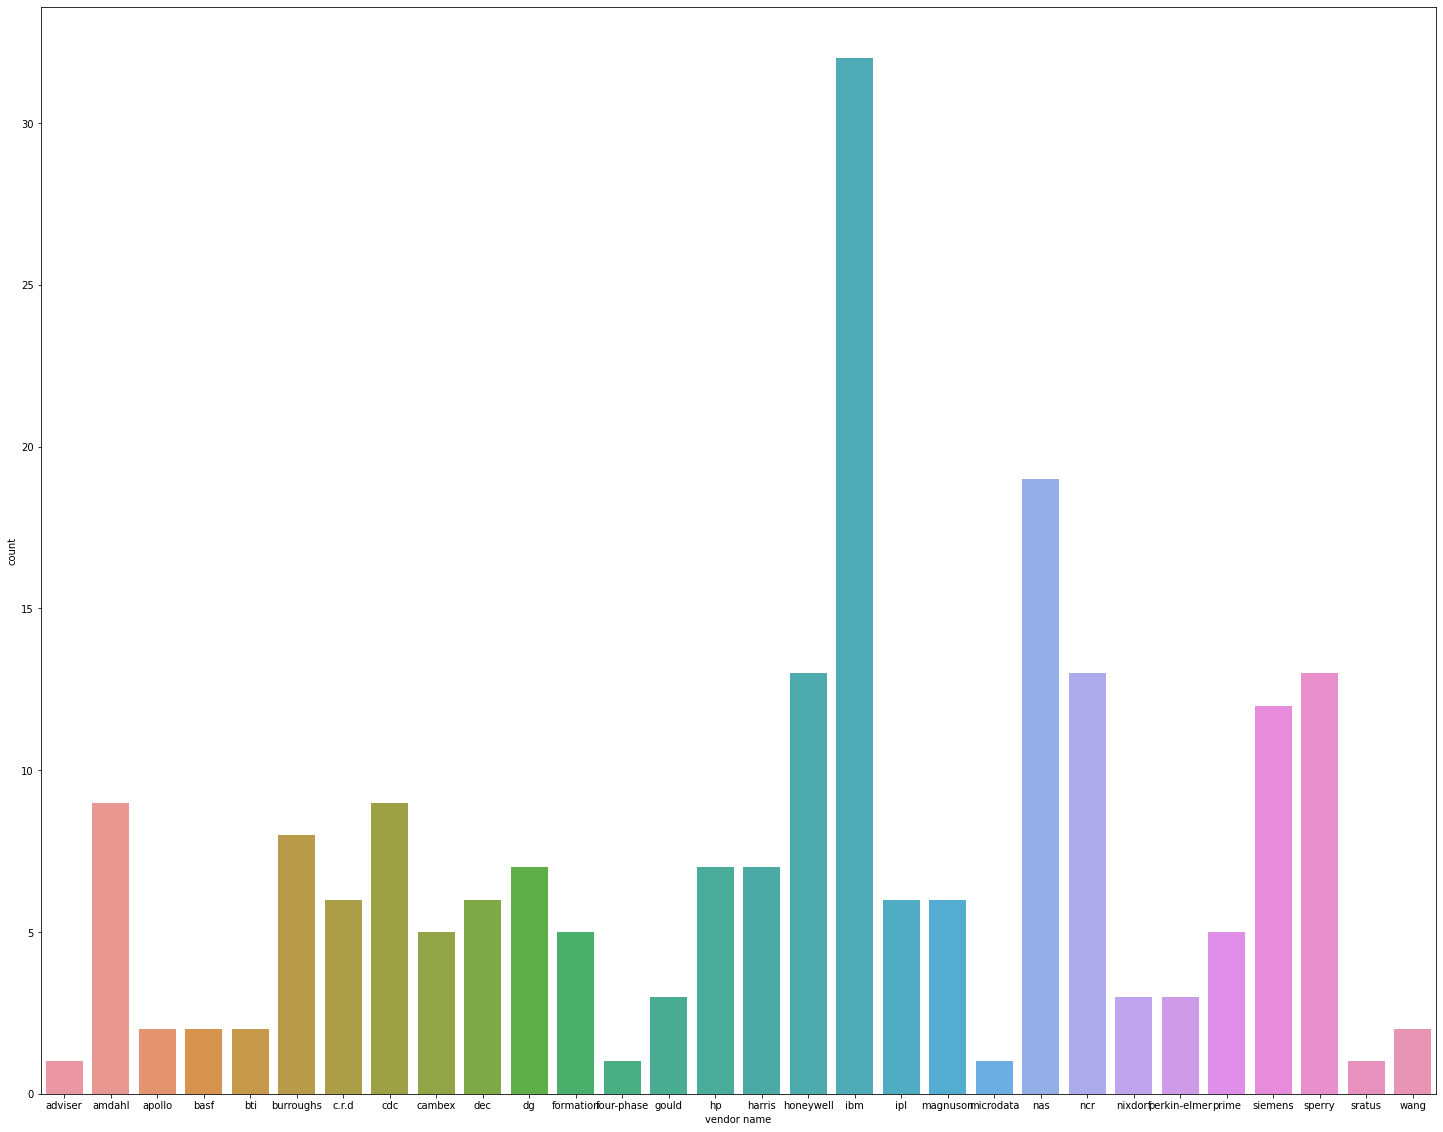

In [51]:
fig,ax=plt.subplots(figsize=(25,20))
sns.countplot(df['vendor name'],ax=ax)


as we can see ibm sells the highest amount of processors followed by nas,companies like adviser,four phase,microdata sells only 2 to 3 units

In [55]:
#erp is our target variable
df.corr()
#as we can see mmin,mmax,prp are highly correlated with erp

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
myct,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
mmin,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
mmax,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
cach,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
chmin,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
chmax,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
prp,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
erp,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


<AxesSubplot:>

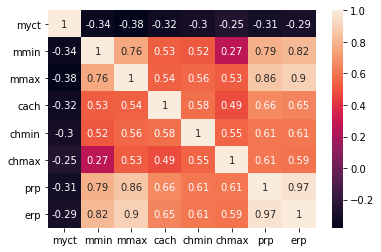

In [58]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='erp', ylabel='mmin'>

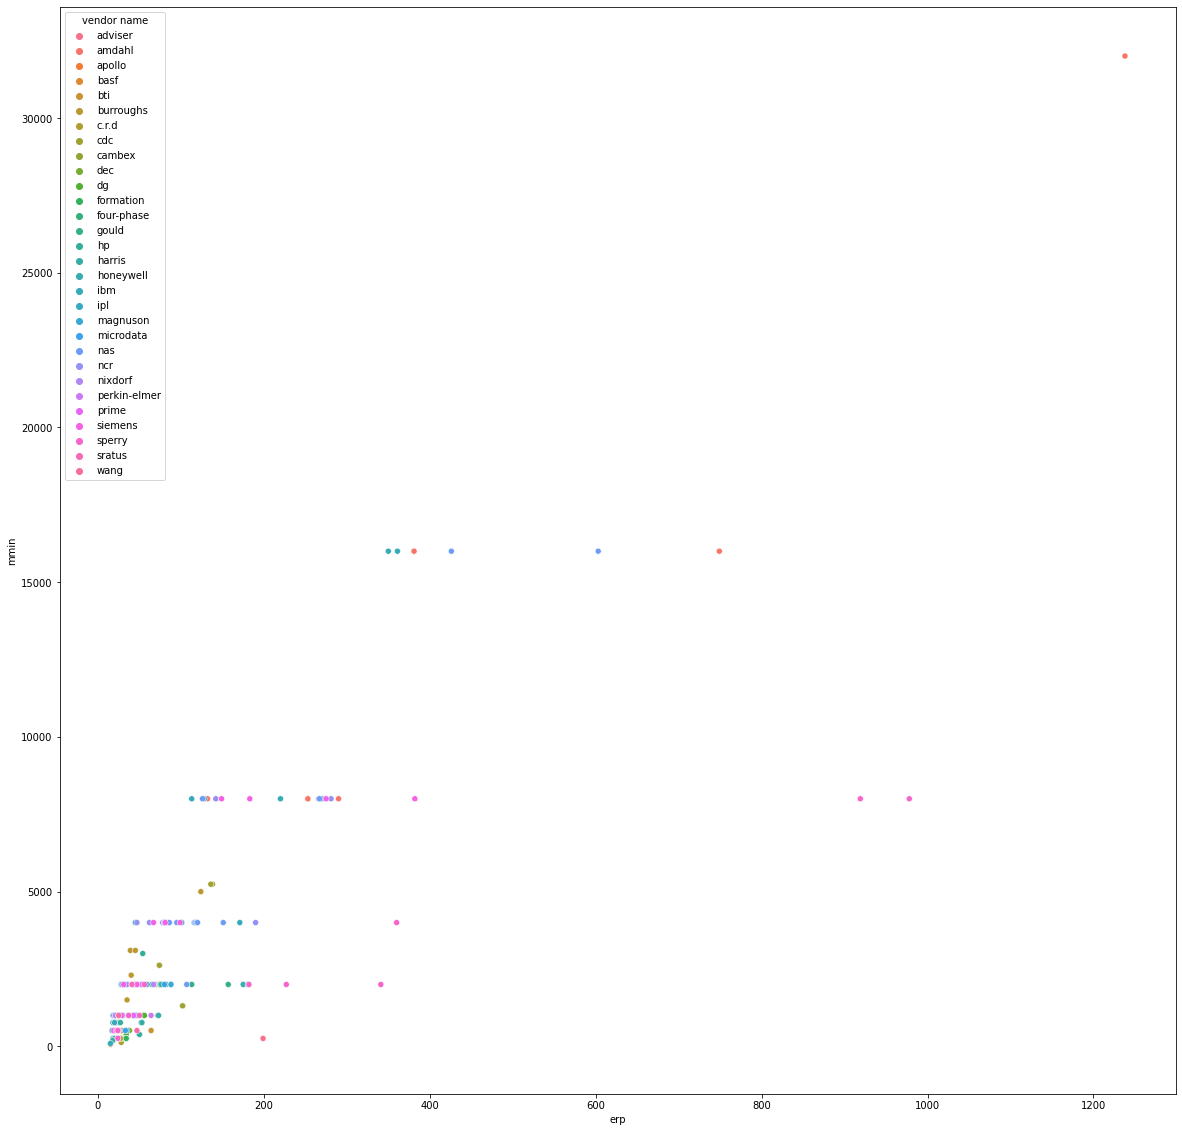

In [82]:
fig,ax=plt.subplots(figsize=(20,20))
sns.scatterplot(df['erp'],df['mmin'],hue=df['vendor name'])

from the above plot we can say that mmin with values from 0 to 8000 are likely to have erp between 0 and 400,mmin with values higher than 30000 have an erp of 1200

<AxesSubplot:xlabel='erp', ylabel='mmax'>

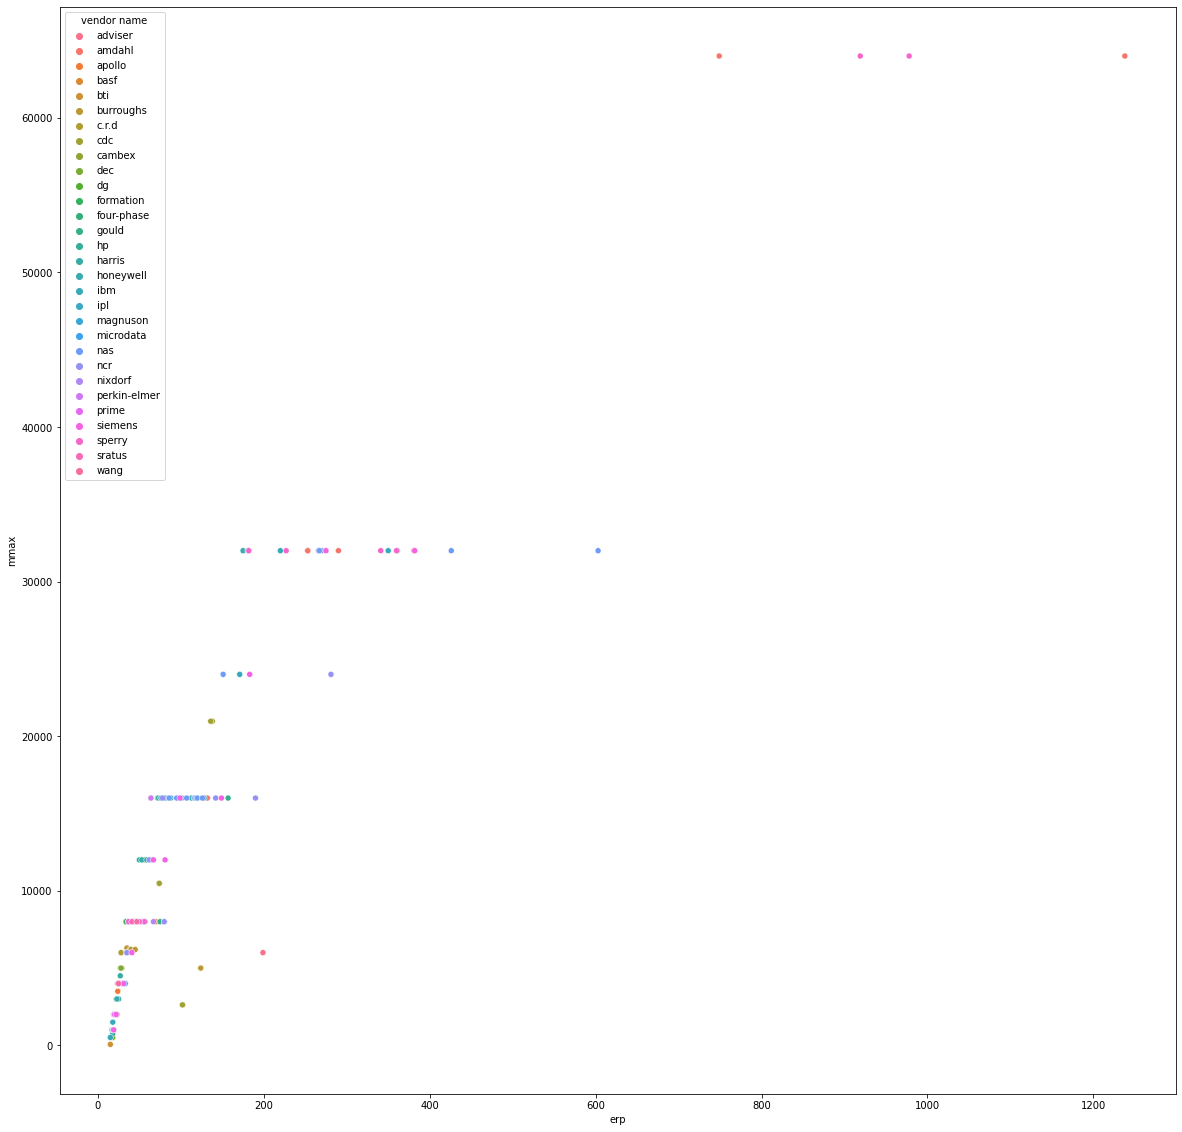

In [81]:
fig,ax=plt.subplots(figsize=(20,20))
sns.scatterplot(df['erp'],df['mmax'],hue=df['vendor name'])

from the above plot we can say that mmax with values from 0 to 30000 are likely to have erp between 0 and 400,mmax with values higher than 60000 have an erp of 800 to 1200

<AxesSubplot:xlabel='erp', ylabel='prp'>

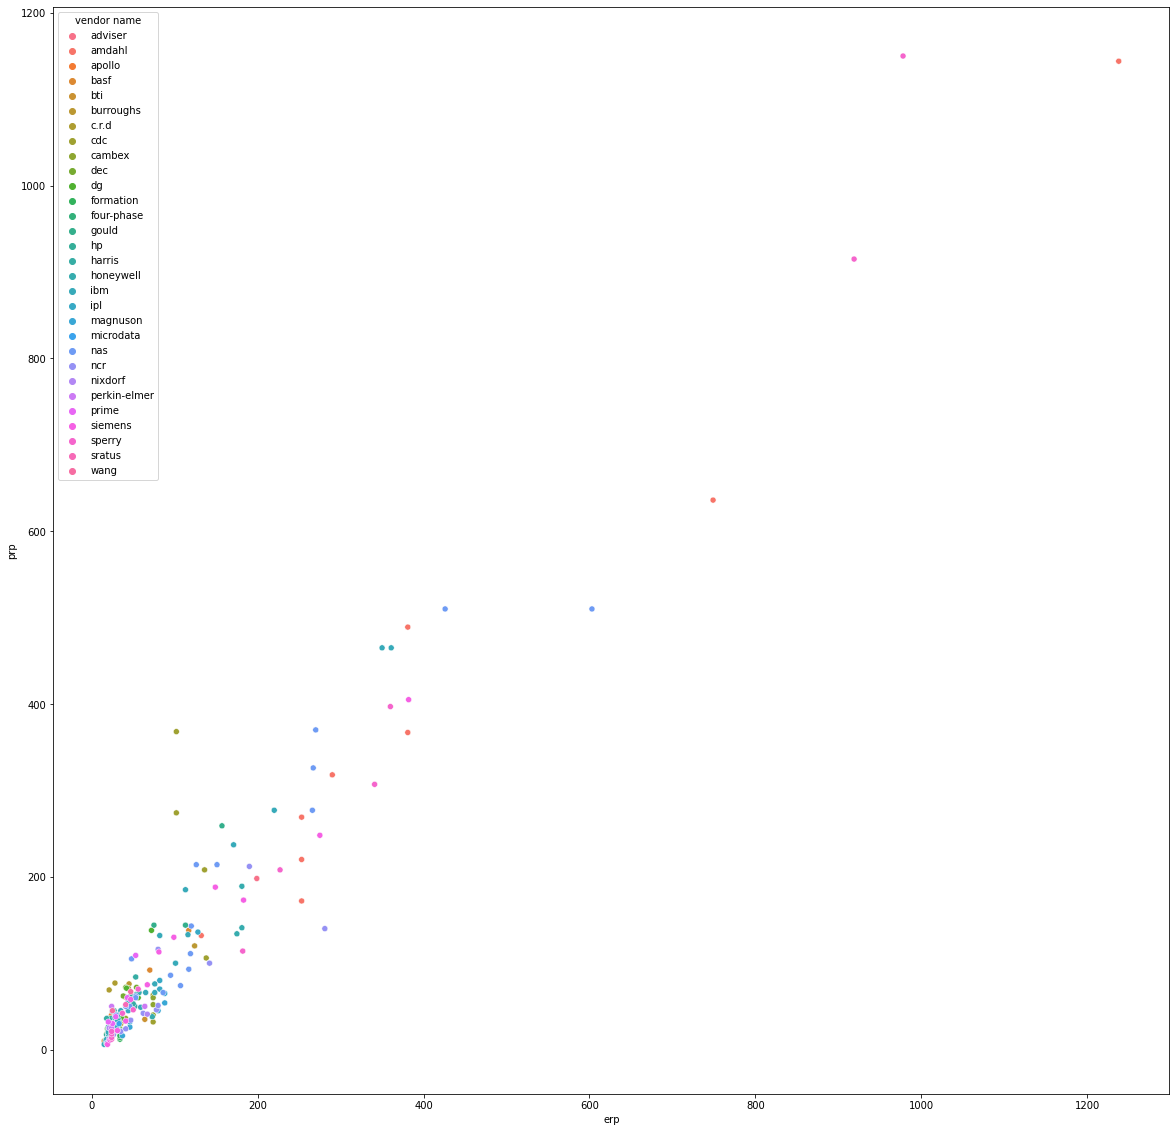

In [79]:
fig,ax=plt.subplots(figsize=(20,20))
sns.scatterplot(df['erp'],df['prp'],hue=df['vendor name'])

from the above plot it is clear that prp values from 0 to 600 can have erp values from 0 to 400

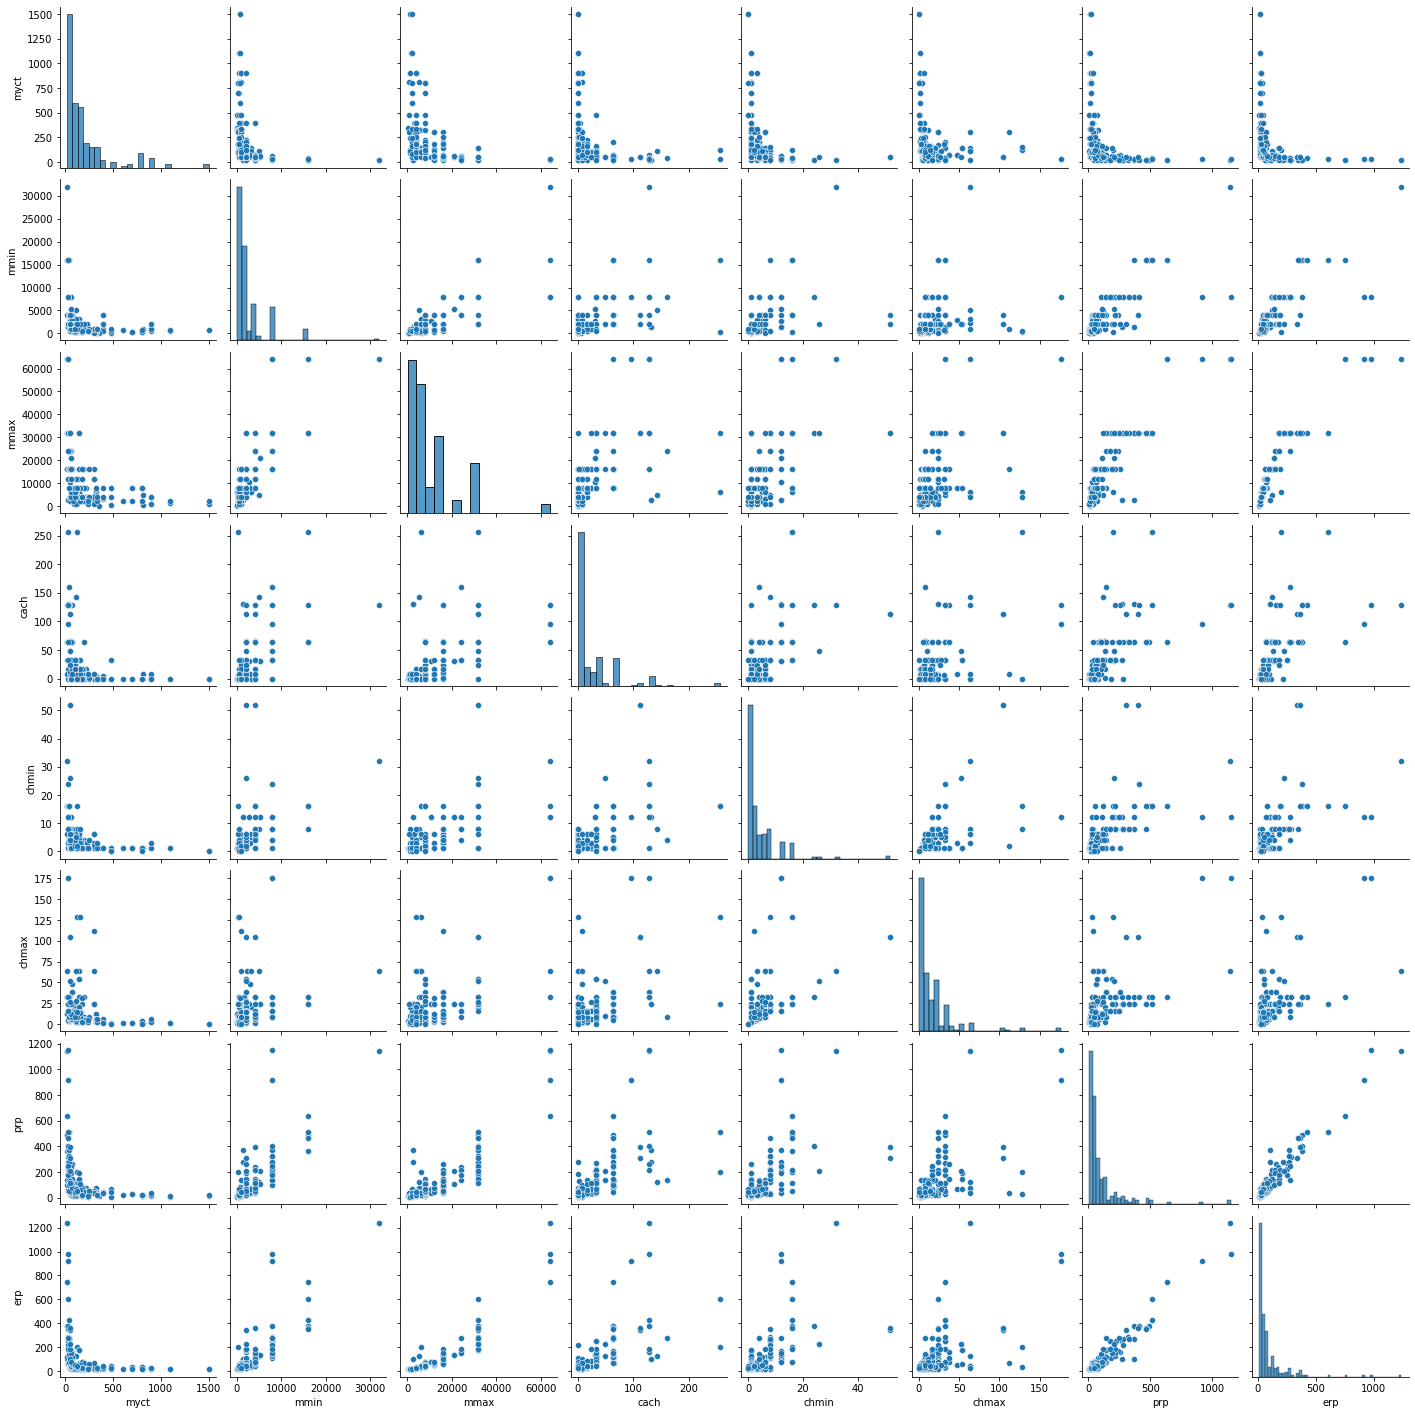

In [84]:
sns.pairplot(df)

now lets prepare the data for training the model

In [91]:
df.drop(['model'],inplace=True,axis=1)
df.head()

,vendor name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,125,256,6000,256,16,128,198,199
1,amdahl,29,8000,32000,32,8,32,269,253
2,amdahl,29,8000,32000,32,8,32,220,253
3,amdahl,29,8000,32000,32,8,32,172,253
4,amdahl,29,8000,16000,32,8,16,132,132


In [94]:
from sklearn.preprocessing import LabelEncoder #importing the encoder for encoding the vendor names
le=LabelEncoder()
df['vendor name']=le.fit_transform(df['vendor name'])
df.head()

,vendor name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,0,125,256,6000,256,16,128,198,199
1,1,29,8000,32000,32,8,32,269,253
2,1,29,8000,32000,32,8,32,220,253
3,1,29,8000,32000,32,8,32,172,253
4,1,29,8000,16000,32,8,16,132,132


the above code encodes the vendors name  to integers

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x=df.drop(['erp'],axis=1)
y=df['erp']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#splitting the data into train and test set

In [104]:
#now lets train the model using xgboost regressor
import xgboost
from sklearn.metrics import mean_squared_error
xgb_reg=xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train)
predictions1=xgb_reg.predict(x_test)
print("RMSE :",np.sqrt(mean_squared_error(y_test,predictions1)))


RMSE : 78.16396050037736


In [105]:
#now lets try it with linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
predictions2=lr.predict(x_test)
print("RMSE :",np.sqrt(mean_squared_error(y_test,predictions2)))


RMSE : 54.89772870895659


by checking the rmse values of xgboost and linear regression we can see that linear regression is better so we can use it as our final model.

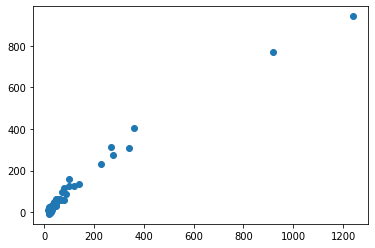

In [112]:
plt.scatter(y_test,predictions2)